In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots
import glob
from scipy.stats import binned_statistic, mode

In [2]:
dbfiles = glob.glob('*10yrs.db')
dbfiles.sort()

In [3]:
dbfiles

['baseline_nexp2_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw0.6_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw0.6v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw0.9_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw0.9v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw1.2_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw1.2v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw1.5_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw1.5v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw1.8_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw1.8v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw2.1_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw2.1v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw2.4_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw2.4v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw2.7_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw2.7v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw3.0_unc_v1.7_10yrs.db',
 'rolling_nm_scale0.9_nslice2_fpw3.0v1

In [4]:
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

ra = 0
dec = -20.

f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
        'i': 'cyan', 'z': 'orange', 'y': 'red'}



In [5]:
def mymode(arr):
    counts = np.bincount(arr)
    return np.argmax(counts)

In [6]:
def p_clip_mean(arr, percentile=85):
    """Take the mean after clipping off some top percentile"""
    percentile_val = np.percentile(arr, percentile)
    good = np.where(arr <= percentile_val)[0]
    return np.mean(arr[good])

In [7]:
def gap_stats(inarr, bins):
    inarr = np.sort(inarr)
    
    count, _b1, _b2 = binned_statistic(inarr, inarr, bins=bins, statistic=np.size)
    unight = np.unique(inarr)
    di = np.diff(unight)
    good = np.where(di < 50.)[0]
    
    me, _b1, _b2 = binned_statistic(unight[1:][good], di[good], bins=bins, statistic=p_clip_mean)
    med, _b1, _b2 = binned_statistic(unight[1:][good], di[good], bins=bins, statistic=np.median)
    nm, _b1, _b2 = binned_statistic(unight[1:][good], di[good], bins=bins, statistic=mymode)
    un, _b1, _b2 = binned_statistic(unight[1:][good], di[good], bins=bins, statistic=np.size)
    
    
    return count, me, med, nm, un

Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1570382 visits
Running:  ['baseline_nexp2_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1568306 visits
Running:  ['rolling_nm_scale0_9_nslice2_fpw0_6_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA'

Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1528981 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw0_6_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1568448 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw0_6v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1567813 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw0_9_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1565927 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw0_9v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1562633 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw1_2_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1563784 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw1_2v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1557675 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw1_5_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1560292 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw1_5v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1553165 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw1_8_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1557230 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw1_8v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1549092 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw2_1_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1554539 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw2_1v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1545078 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw2_4_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1550509 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw2_4v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1540550 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw2_7_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1547234 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw2_7v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1538232 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw3_0_unc_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1543997 visits
Running:  ['rolling_nm_scale0_9_nslice3_fpw3_0v1_7_10yrs_db_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


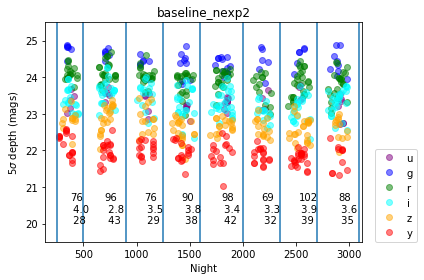

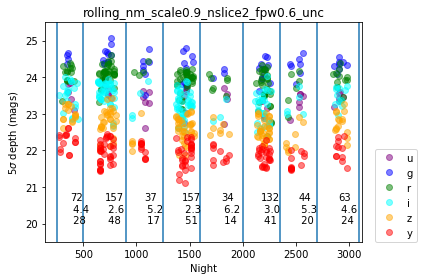

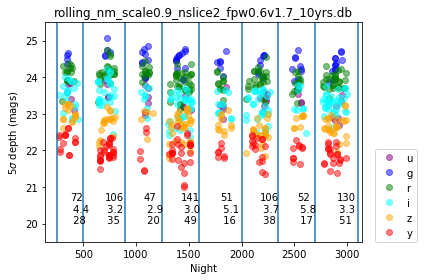

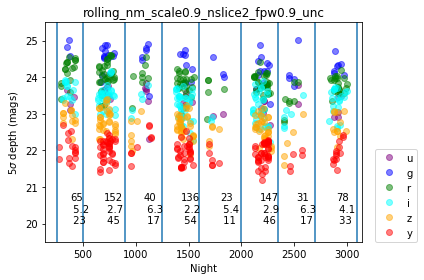

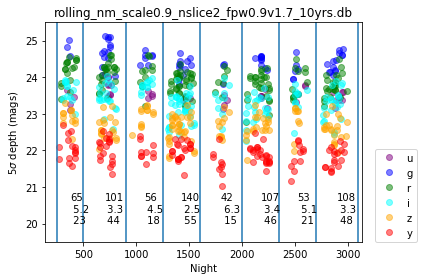

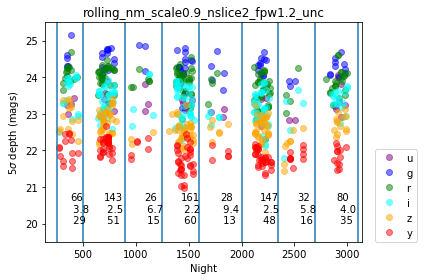

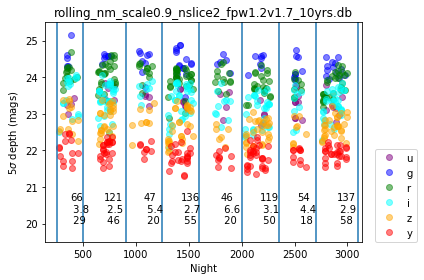

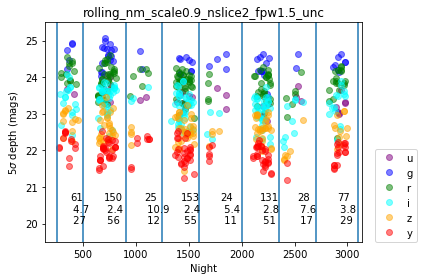

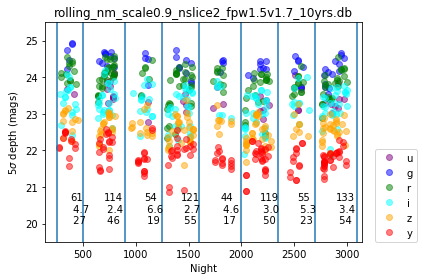

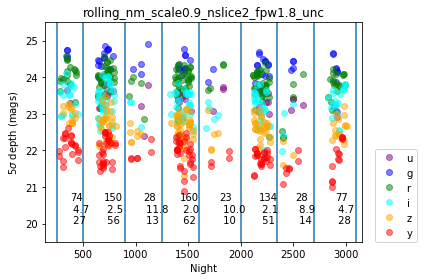

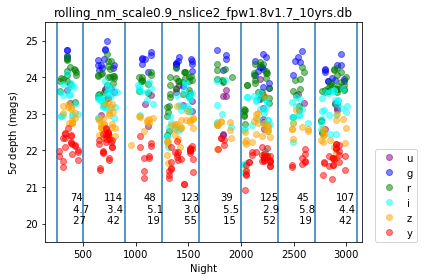

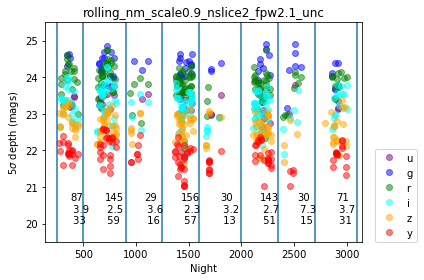

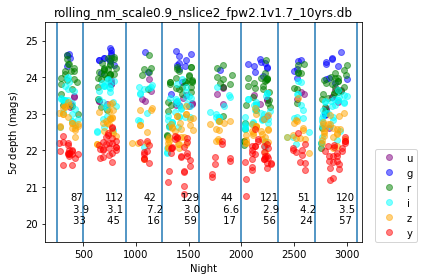

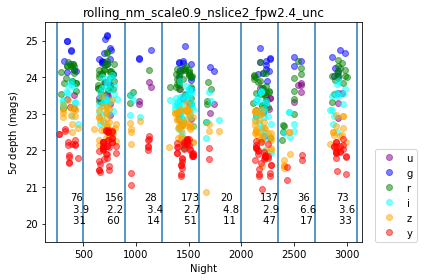

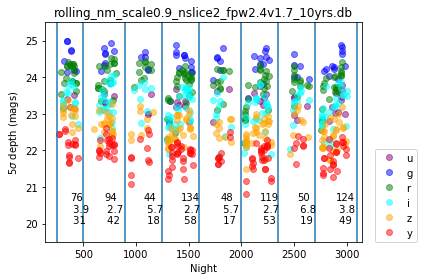

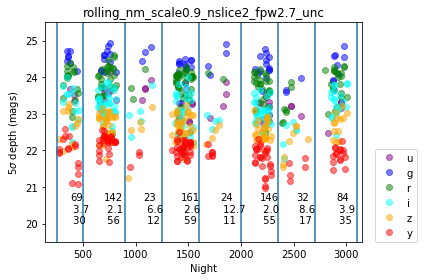

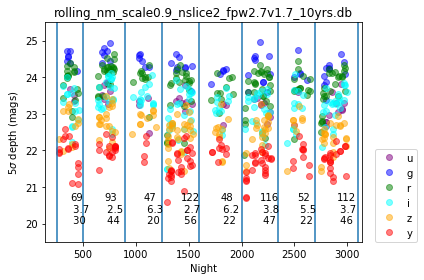

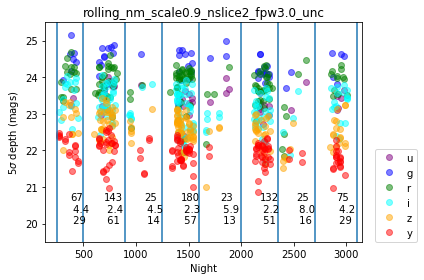

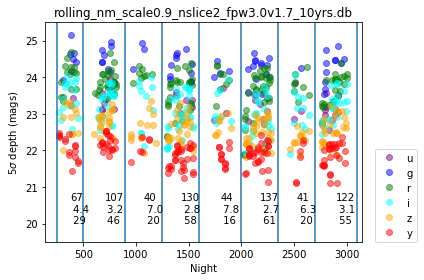

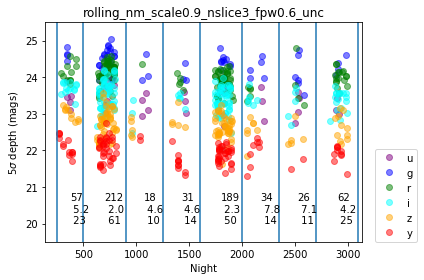

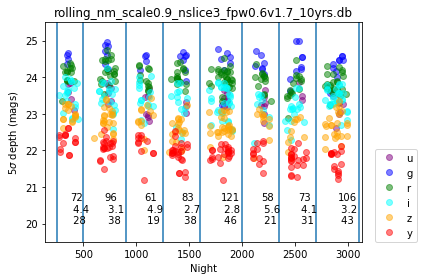

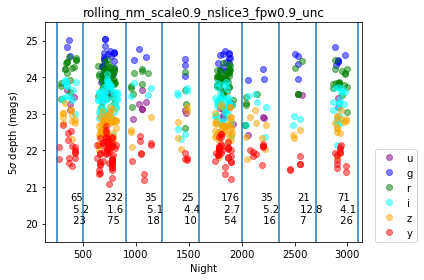

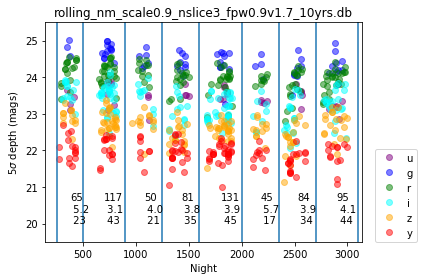

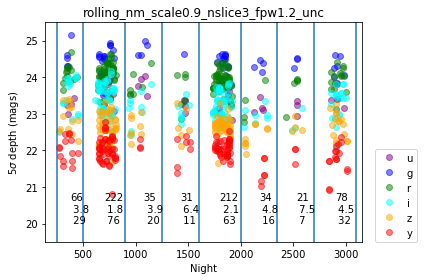

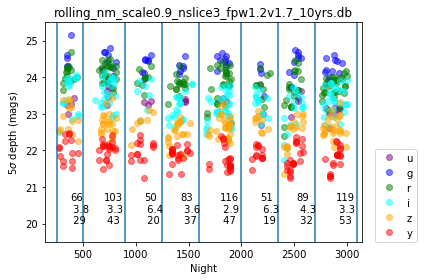

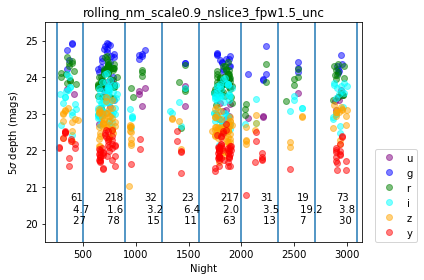

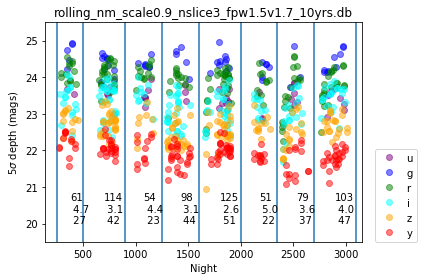

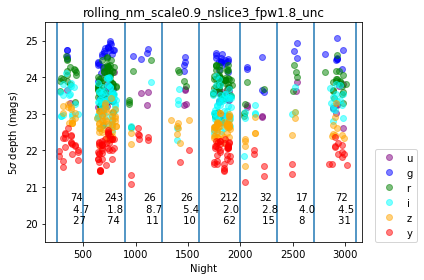

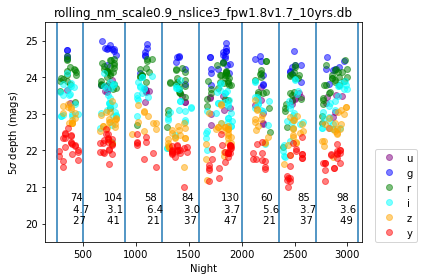

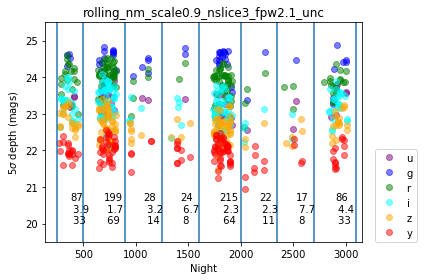

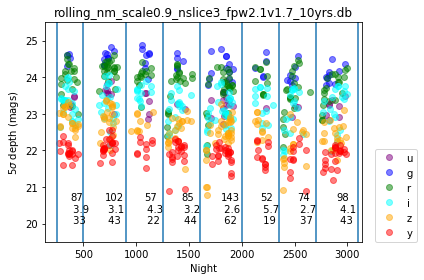

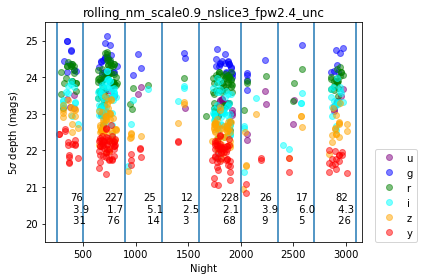

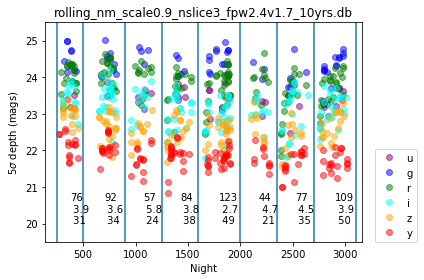

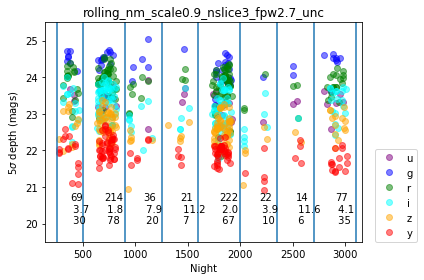

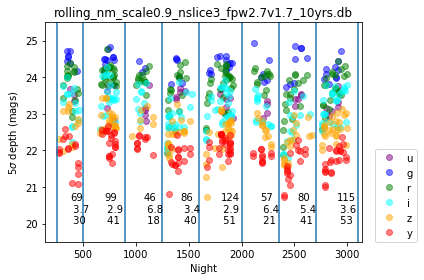

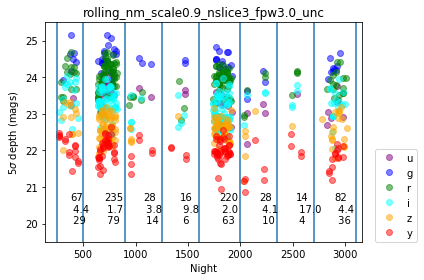

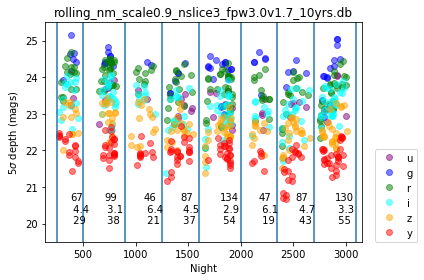

In [8]:
for filename in dbfiles:

    name = filename.replace('_v1.7_10yrs.db', '')

    conn = db.OpsimDatabase(filename)
    bundleList = []
    sql = 'night > 250 and night < %i' %(365*8.5)
    metric = metrics.PassMetric(['filter', 'observationStartMJD', 'fiveSigmaDepth', 'night'])
    slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
    summaryStats = []
    plotDict = {}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=name))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    #bg.plotAll(closefigs=False)

    mv = bundleList[0].metricValues[0]
    plt.figure()
    for fn in f2c:
        in_filt = np.where(mv['filter'] == fn)[0]
        plt.plot(mv['night'][in_filt],
                 mv['fiveSigmaDepth'][in_filt], 'o',
                 color=f2c[fn], label=fn, alpha=0.5)
    plt.xlabel('Night')
    plt.ylabel(r'5$\sigma$ depth (mags)')
    plt.legend(loc=(1.04,0))

    breaks = np.array([250, 500, 900, 1250, 1600, 2000, 2350, 2700, 3100])
    for br in breaks:
        plt.axvline(br)

    di = np.diff(breaks)
    mps = breaks[0:-1] + di/2
    counts, mean_gaps, med_gaps, mode_gaps, unights = gap_stats(mv['night'], bins=breaks)
    
    for i in np.arange(mps.size):
        plt.annotate('%i\n %.1f \n %i' % (counts[i], mean_gaps[i], unights[i]), [mps[i], 20])

    plt.ylim([19.5, 25.5])
    #plt.xlim([1340, 1560])
    plt.title(name)
    plt.tight_layout()
    #plt.savefig('ddf_plots/ddf_m5_%s.pdf' % name, type='pdf')


In [9]:
# OK, let's look at a few internight histograms
db_files = ['baseline_nexp2_v1.7_10yrs.db',
 'rolling_scale0.4_nslice2_v1.7_10yrs.db',
 'rolling_scale0.9_nslice2_v1.7_10yrs.db']

Querying database SummaryAllProps with constraint night > 250 and night < 3102 for columns ['fiveSigmaDepth', 'fieldDec', 'observationStartMJD', 'filter', 'fieldRA', 'night']
Found 1570382 visits
Running:  ['baseline_nexp2_Pass_filter_observationStartMJD_fiveSigmaDepth_night_night_gt_250_and_night_lt_3102_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


OSError: Sqlite database file "rolling_scale0.4_nslice2_v1.7_10yrs.db" not found.

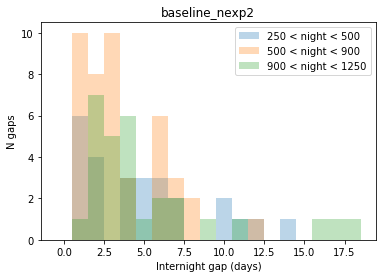

In [10]:
for filename in db_files:

    name = filename.replace('_v1.7_10yrs.db', '')

    conn = db.OpsimDatabase(filename)
    bundleList = []
    sql = 'night > 250 and night < %i' %(365*8.5)
    metric = metrics.PassMetric(['filter', 'observationStartMJD', 'fiveSigmaDepth', 'night'])
    slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
    summaryStats = []
    plotDict = {}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=name))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    #bg.plotAll(closefigs=False)

    mv = bundleList[0].metricValues[0]
    
    plt.figure()
    unights = np.unique(mv['night'])
    bins = np.arange(0,20,1)-0.5
    breaks = np.array([250, 500, 900, 1250, 1600, 2000, 2350, 2700, 3100])
    for i in range(3):
        good = np.where((unights > breaks[i]) & (unights < breaks[i+1]))
        di = np.diff(unights[good])
        _temp = plt.hist(di, bins=bins, label='%i < night < %i' % (breaks[i], breaks[i+1]), alpha=0.3)
    plt.title(name)
    plt.legend()
    plt.xlabel('Internight gap (days)')
    plt.ylabel('N gaps')

In [ ]:
for filename in db_files:

    name = filename.replace('_v1.7_10yrs.db', '')

    conn = db.OpsimDatabase(filename)
    bundleList = []
    sql = 'night > 250 and night < %i' %(365*8.5)
    metric = metrics.PassMetric(['filter', 'observationStartMJD', 'fiveSigmaDepth', 'night'])
    slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
    summaryStats = []
    plotDict = {}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=name))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    #bg.plotAll(closefigs=False)

    mv = bundleList[0].metricValues[0]
    
    plt.figure()
    unights = np.unique(mv['night'])
    bins = np.arange(0,300,1)-0.5
    breaks = np.array([250, 500, 900, 1250, 1600, 2000, 2350, 2700, 3100])
    for i in range(3):
        good = np.where((unights > breaks[i]) & (unights < breaks[i+1]))
        di = np.diff(unights[good])
        _temp = plt.hist(di, bins=bins, label='%i < night < %i' % (breaks[i], breaks[i+1]), alpha=0.3)
    plt.title(name)
    plt.legend()
    plt.xlabel('Internight gap (days)')
    plt.ylabel('N gaps')